## Importing Necessary **Libraries**

In [1]:
!pip install yfinance ta --quiet



  Preparing metadata (setup.py) ... done


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volatility import BollingerBands
from ta.trend import SMAIndicator, EMAIndicator
from ta.momentum import RSIIndicator
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
bhavcopy_path = '/content/drive/MyDrive/datascience project /nse bhavcopy.csv'
# Load the Bhavcopy
df_bhav = pd.read_csv(bhavcopy_path)

# Preview the first few rows
df_bhav.head()

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,BE,03-MAY-1995,10,1,INE253B01015,10
2,360ONE,360 ONE WAM LIMITED,EQ,19-SEP-2019,1,1,INE466L01038,1
3,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10,1,INE748C01038,10
4,3MINDIA,3M India Limited,EQ,13-AUG-2004,10,1,INE470A01017,10


In [5]:
#Strip whitespace from column names
df_bhav.columns = df_bhav.columns.str.strip()

# Now you can filter safely
df_eq = df_bhav[df_bhav['SERIES'] == 'EQ']

# Extract symbols and format for Yahoo Finance
symbols = df_eq['SYMBOL'].unique().tolist()
symbols = [symbol + ".NS" for symbol in symbols]

print("Total EQ stocks found:", len(symbols))
print("Example tickers:", symbols[:5])


Total EQ stocks found: 1797
Example tickers: ['20MICRONS.NS', '360ONE.NS', '3IINFOLTD.NS', '3MINDIA.NS', '5PAISA.NS']


In [ ]:
import os
import time
from concurrent.futures import ThreadPoolExecutor, as_completed

# Output folder in your Drive
output_dir = "/content/drive/MyDrive/NSE_Stock_Data"
os.makedirs(output_dir, exist_ok=True)

# Function to download one stock
def download_stock(symbol):
    try:
        filename = f"{symbol}_2006_2025.csv"
        filepath = os.path.join(output_dir, filename)

        if os.path.exists(filepath):
            return f"Already exists: {symbol}"

        data = yf.download(symbol, start="2006-01-01", end="2025-01-01", progress=False)
        if not data.empty:
            data.reset_index(inplace=True)
            data.to_csv(filepath, index=False)
            return f"Downloaded: {symbol}"
        else:
            return f"No data: {symbol}"
    except Exception as e:
        return f"Failed {symbol}: {e}"

#  Multithreaded download using ThreadPoolExecutor
max_threads = 10  # You can increase to 15 or 20 if your system can handle it

print("Starting multithreaded download...")
with ThreadPoolExecutor(max_workers=max_threads) as executor:
    futures = {executor.submit(download_stock, symbol): symbol for symbol in symbols}

    for future in as_completed(futures):
        result = future.result()
        print(result)

Starting multithreaded download...
YF.download() has changed argument auto_adjust default to True
Downloaded: AAATECH.NS
Downloaded: 5PAISA.NS
Downloaded: AAREYDRUGS.NS
Downloaded: 3IINFOLTD.NS
Downloaded: AAKASH.NS
Downloaded: 360ONE.NS
Downloaded: 63MOONS.NS
Downloaded: 20MICRONS.NS
Downloaded: AADHARHFC.NS
Downloaded: 3MINDIA.NS
Downloaded: AARTIIND.NS
Downloaded: AARTIPHARM.NS
Downloaded: AARON.NS
Downloaded: AARTISURF.NS
Downloaded: ABBOTINDIA.NS
Downloaded: AARVI.NS
Downloaded: ABCAPITAL.NS
Downloaded: AAVAS.NS
Downloaded: ABB.NS
Downloaded: AARTIDRUGS.NS
Downloaded: ABFRL.NS
Downloaded: ACCURACY.NS
Downloaded: ABSLAMC.NS
Downloaded: ABMINTLLTD.NS
Downloaded: ACCELYA.NS
Downloaded: ABREL.NS
Downloaded: ABINFRA.NS
Downloaded: ABDL.NS
Downloaded: ACC.NS
Downloaded: ACE.NS
Downloaded: ACL.NS
Downloaded: ADANIENSOL.NS
Downloaded: ACLGATI.NS
Downloaded: ADANIENT.NS
Downloaded: ADANIPORTS.NS
Downloaded: ACI.NS
Downloaded: ADANIGREEN.NS
Downloaded: ACEINTEG.NS
Downloaded: ACMESOLAR.NS
D

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGARWALEYE.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1136053800, endDate = 1735669800")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AGARWALEYE.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1136053800, endDate = 1735669800")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:


No data: CARYSIL.NS
Failed CDSL.NS: No objects to concatenate
Failed CCHHL.NS: No objects to concatenate
Failed CEATLTD.NS: No objects to concatenate
Failed CCL.NS: No objects to concatenate
Failed CELEBRITY.NS: No objects to concatenate
Failed CASTROLIND.NS: No objects to concatenate
Failed CELLO.NS: No objects to concatenate
Failed CENTENKA.NS: No objects to concatenate
Failed CEIGALL.NS: No objects to concatenate
Downloaded: CGPOWER.NS
Downloaded: CENTEXT.NS
Downloaded: CENTRUM.NS
Downloaded: CENTUM.NS
Downloaded: CENTRALBK.NS
Downloaded: CGCL.NS
Downloaded: CESC.NS
Downloaded: CENTURYPLY.NS
Downloaded: CEWATER.NS
Downloaded: CERA.NS
Downloaded: CHAMBLFERT.NS
Downloaded: CHOLAFIN.NS
Downloaded: CHALET.NS
Downloaded: CHEMBOND.NS
Downloaded: CHENNPETRO.NS
Downloaded: CHOICEIN.NS
Downloaded: CHEVIOT.NS
Downloaded: CHEMFAB.NS
Downloaded: CHEMCON.NS
Downloaded: CHEMPLASTS.NS
Downloaded: CIGNITITEC.NS
Downloaded: CHOLAHLDNG.NS
Downloaded: CINEVISTA.NS
Downloaded: CIPLA.NS
Downloaded: CLEA

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AJAXENGG.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1136053800, endDate = 1735669800")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AJAXENGG.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1136053800, endDate = 1735669800")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:


Downloaded: DCMSHRIRAM.NS
Downloaded: DCMSRIND.NS
Downloaded: DDEVPLSTIK.NS
Downloaded: DCMNVL.NS
Downloaded: DCMFINSERV.NS
Downloaded: DCXINDIA.NS
Downloaded: DCI.NS
Downloaded: DCM.NS
Downloaded: DCW.NS
Downloaded: DECCANCE.NS
No data: DEEPINDS.NS
Failed DEEDEV.NS: No objects to concatenate
Failed DENORA.NS: No objects to concatenate
Failed DELTACORP.NS: No objects to concatenate


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AJAXENGG.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1136053800, endDate = 1735669800")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:


Failed DEEPAKNTR.NS: No objects to concatenate
Failed DEVIT.NS: No objects to concatenate
Failed DEEPAKFERT.NS: No objects to concatenate
Failed DEN.NS: No objects to concatenate
Failed DELHIVERY.NS: No objects to concatenate
Downloaded: DENTA.NS
Downloaded: DICIND.NS
Downloaded: DEVYANI.NS
Downloaded: DIAMINESQ.NS
Downloaded: DHANI.NS
Downloaded: DHARMAJ.NS
Downloaded: DHUNINV.NS
Downloaded: DIAMONDYD.NS
Downloaded: DHAMPURSUG.NS
Downloaded: DHANUKA.NS
Downloaded: DIGIDRIVE.NS
Downloaded: DMART.NS
Downloaded: DOLATALGO.NS
Downloaded: DIVGIITTS.NS
Downloaded: DNAMEDIA.NS
Downloaded: DIVISLAB.NS
Downloaded: DIXON.NS
Downloaded: DODLA.NS
Downloaded: DLINKINDIA.NS
Downloaded: DLF.NS
Downloaded: DISHTV.NS
Downloaded: DIGISPICE.NS
Downloaded: DRCSYSTEMS.NS
Downloaded: DPABHUSHAN.NS
Downloaded: DREDGECORP.NS
Downloaded: DOLLAR.NS
Downloaded: DREAMFOLKS.NS
Downloaded: DOMS.NS
Downloaded: DONEAR.NS
Downloaded: DRREDDY.NS
Downloaded: DPSCLTD.NS
Downloaded: DPWIRES.NS
Downloaded: DYNAMATECH.NS
D

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALIVUS.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1136053800, endDate = 1735669800")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:


No data: EPACK.NS
Failed EMSLIMITED.NS: No objects to concatenate
Failed ENIL.NS: No objects to concatenate
Failed EPIGRAL.NS: No objects to concatenate
Failed EMMBI.NS: No objects to concatenate
Failed ENDURANCE.NS: No objects to concatenate
Failed ENTERO.NS: No objects to concatenate
Failed ENGINERSIN.NS: No objects to concatenate
Failed EMIL.NS: No objects to concatenate
Downloaded: ERIS.NS
Downloaded: EMUDHRA.NS
Downloaded: EQUITASBNK.NS
Downloaded: ESAFSFB.NS
Downloaded: ESTER.NS
Downloaded: ETHOSLTD.NS
Downloaded: ESCORTS.NS
Downloaded: ESABINDIA.NS
Downloaded: EPL.NS
Downloaded: ESSENTIA.NS
Downloaded: EXICOM.NS
Downloaded: FACT.NS
Downloaded: EXIDEIND.NS
Downloaded: FAZE3Q.NS
Downloaded: FAIRCHEMOR.NS
Downloaded: EXXARO.NS
Downloaded: FCL.NS
Downloaded: EUREKAFORB.NS
Downloaded: EXPLEOSOL.NS
Downloaded: EVEREADY.NS
Downloaded: EXCELINDUS.NS
Downloaded: FEDFINA.NS
Downloaded: FDC.NS
Downloaded: FINEORG.NS
Downloaded: FILATEX.NS
Downloaded: FIBERWEB.NS
Downloaded: FCSSOFT.NS
Down

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOSCHIP.NS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2006-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1136053800, endDate = 1735669800")')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:
1 Failed download:


Downloaded: MRPL.NS
Downloaded: MRF.NS
No data: MUNJALAU.NS
Failed MUKANDLTD.NS: No objects to concatenate
Failed MTNL.NS: No objects to concatenate
Failed MUKTAARTS.NS: No objects to concatenate
Failed MUFIN.NS: No objects to concatenate
Failed MSTCLTD.NS: No objects to concatenate
Failed MTARTECH.NS: No objects to concatenate
Failed MUKKA.NS: No objects to concatenate
Failed MSUMI.NS: No objects to concatenate
Failed MUFTI.NS: No objects to concatenate
Downloaded: MURUDCERA.NS
Downloaded: NAGAFERT.NS
Downloaded: MUTHOOTFIN.NS
Downloaded: NACLIND.NS
Downloaded: NAGREEKCAP.NS
Downloaded: MUNJALSHOW.NS
Downloaded: MUTHOOTMF.NS
Downloaded: NAGREEKEXP.NS
Downloaded: MUTHOOTCAP.NS
Downloaded: MVGJL.NS
Downloaded: NATIONALUM.NS
Downloaded: NAHARINDUS.NS
Downloaded: NATCOPHARM.NS
Downloaded: NAHARPOLY.NS
Downloaded: NATHBIOGEN.NS
Downloaded: NAHARCAP.NS
Downloaded: NATCAPSUQ.NS
Downloaded: NAHARSPING.NS
Downloaded: NAM-INDIA.NS
Downloaded: NAUKRI.NS
Downloaded: NBCC.NS
Downloaded: NAVA.NS
Do

In [ ]:
import os
import pandas as pd

data_dir = "/content/drive/MyDrive/NSE_Stock_Data"
volume_stats = []

# Must-have bluechip stocks (ensure they are included)
must_include = ["RELIANCE.NS", "TCS.NS", "HDFCBANK.NS", "INFY.NS", "ICICIBANK.NS",
                "ULTRACEMCO.NS", "TATAMOTORS.NS", "LT.NS", "SBIN.NS", "BAJFINANCE.NS"]

# Step 1: Loop and calculate total traded value
for file in os.listdir(data_dir):
    if file.endswith(".csv") and "top_250" not in file:
        try:
            df = pd.read_csv(os.path.join(data_dir, file))
            df = df.drop(index=0).reset_index(drop=True)

            # Convert Volume & Close to numeric
            df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
            df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

            # Compute total traded value
            total_value = (df['Volume'] * df['Close']).sum(skipna=True)
            symbol = file.split("_")[0]
            volume_stats.append((symbol, total_value))
        except Exception as e:
            print(f"Skipping {file}: {e}")

# Step 2: Create DataFrame & sort
value_df = pd.DataFrame(volume_stats, columns=["Symbol", "TotalTradedValue"])
value_df = value_df.sort_values(by="TotalTradedValue", ascending=False)

# Step 3: Get top 250 and manually add any missing must-have giants
top_250 = value_df["Symbol"].tolist()

# Ensure all bluechips are included
for stock in must_include:
    if stock not in top_250:
        top_250.insert(0, stock)  # force include at the top

# Trim to exactly 250
top_250 = top_250[:250]

# Step 4: Save filtered list to CSV
filtered_df = value_df[value_df["Symbol"].isin(top_250)].copy()
output_path = "/content/drive/MyDrive/NSE_Stock_Data/top_250_by_value.csv"
filtered_df.to_csv(output_path, index=False)

print(f" Final Top 250 saved to: {output_path}")
print(" Top 5 preview:", filtered_df.head()["Symbol"].tolist())


 Final Top 250 saved to: /content/drive/MyDrive/NSE_Stock_Data/top_250_by_value.csv
 Top 5 preview: ['MOREPENLAB.NS', 'MONTECARLO.NS', 'MOLDTKPAC.NS', 'MOL.NS', 'MOKSH.NS']


In [ ]:
import os
import pandas as pd

# Path to stock data and final stock list
data_dir = "/content/drive/MyDrive/NSE_Stock_Data"
final_list_path = os.path.join(data_dir, "final_250_with_bluechips.csv")

# Load the final selected stocks
final_stocks_df = pd.read_csv(final_list_path)
selected_symbols = final_stocks_df["Symbol"].tolist()

# List to hold all DataFrames
merged_data = []

# Loop through each selected stock and clean its data
for symbol in selected_symbols:
    file_path = os.path.join(data_dir, f"{symbol}_2006_2025.csv")

    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path)

            # Drop header/extra row if needed
            df = df.drop(index=0).reset_index(drop=True)

            # Convert types
            df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
            for col in ["Open", "High", "Low", "Close", "Volume"]:
                df[col] = pd.to_numeric(df[col], errors="coerce")

            # Drop rows with missing Date or Close
            df.dropna(subset=["Date", "Close"], inplace=True)

            # Add stock symbol
            df["Stock"] = symbol

            # Append to list
            merged_data.append(df)
        except Exception as e:
            print(f"Skipping {symbol}: {e}")
    else:
        print(f"File not found for {symbol}")

# Combine into one DataFrame
if merged_data:
    final_df = pd.concat(merged_data, ignore_index=True)
    output_path = os.path.join(data_dir, "merged_top250_clean.csv")
    final_df.to_csv(output_path, index=False)
    print(f"Merged dataset saved to: {output_path}")
    print("Shape:", final_df.shape)
else:
    print("No data merged. Check your paths and files.")


Merged dataset saved to: /content/drive/MyDrive/NSE_Stock_Data/merged_top250_clean.csv
Shape: (1020168, 12)


In [ ]:
import pandas as pd

# Load the uploaded merged dataset
file_path = '/content/drive/MyDrive/NSE_Stock_Data/merged_top250_clean.csv'
df = pd.read_csv(file_path)

# Show basic info and check for missing values
df_info = df.info()
missing_summary = df.isnull().sum()

# Display first few rows
df_preview = df.head()

df_info, missing_summary, df_preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020168 entries, 0 to 1020167
Data columns (total 12 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Date      1020168 non-null  object 
 1   Close     1020168 non-null  float64
 2   Close.1   62377 non-null    float64
 3   High      1020168 non-null  float64
 4   High.1    62377 non-null    float64
 5   Low       1020168 non-null  float64
 6   Low.1     62377 non-null    float64
 7   Open      1020168 non-null  float64
 8   Open.1    62377 non-null    float64
 9   Volume    1020168 non-null  int64  
 10  Volume.1  62377 non-null    float64
 11  Stock     1020168 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 93.4+ MB


(None,
 Date             0
 Close            0
 Close.1     957791
 High             0
 High.1      957791
 Low              0
 Low.1       957791
 Open             0
 Open.1      957791
 Volume           0
 Volume.1    957791
 Stock            0
 dtype: int64,
          Date      Close  Close.1       High  High.1        Low  Low.1  \
 0  2006-01-02  50.400826      NaN  51.309894     NaN  50.086148    NaN   
 1  2006-01-03  50.628082      NaN  51.362329     NaN  50.435782    NaN   
 2  2006-01-04  51.834343      NaN  52.227690     NaN  50.872830    NaN   
 3  2006-01-05  53.093056      NaN  53.407730     NaN  51.406035    NaN   
 4  2006-01-06  54.867489      NaN  55.155941     NaN  53.162986    NaN   
 
         Open  Open.1   Volume  Volume.1          Stock  
 0  51.047664     NaN   715590       NaN  MOREPENLAB.NS  
 1  50.732977     NaN   419965       NaN  MOREPENLAB.NS  
 2  51.222470     NaN  1448085       NaN  MOREPENLAB.NS  
 3  51.834344     NaN  3013255       NaN  MOREPENLAB.N

In [ ]:
# Load the merged dataset from Drive
merged_path = "/content/drive/MyDrive/NSE_Stock_Data/merged_top250_clean.csv"
df = pd.read_csv(merged_path)

#Drop any unneccesary columns ending in '.1'
df = df.loc[:, ~df.columns.str.contains(r"\.1$")]

#Converting 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

#Sorting data by Stock and Date
df = df.sort_values(by=["Stock", "Date"]).reset_index(drop=True)

#Check and print missing value summary
print("Missing values after cleaning:\n", df.isnull().sum())

#Save cleaned data to Google Drive
cleaned_path = "/content/drive/MyDrive/NSE_Stock_Data/top250_cleaned_final.csv"
df.to_csv(cleaned_path, index=False)
print("Cleaned dataset saved to:", cleaned_path)


Missing values after cleaning:
 Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Stock     0
dtype: int64
Cleaned dataset saved to: /content/drive/MyDrive/NSE_Stock_Data/top250_cleaned_final.csv


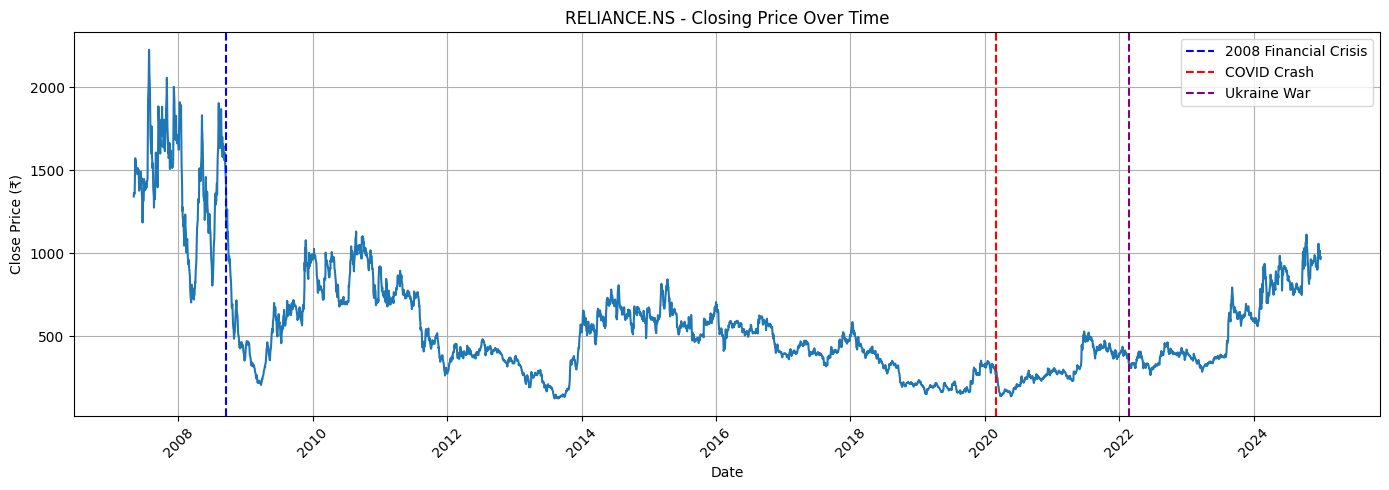

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/top250_cleaned_final.csv")

# Filter for a specific stock
sample_stock = "RELIANCE.NS"
sample_df = df[df["Stock"] == sample_stock].sort_values("Date")

# Ensure 'Date' column is in datetime format
sample_df["Date"] = pd.to_datetime(sample_df["Date"])

# Set a clean plot style
plt.style.use('default')

# Create the plot
plt.figure(figsize=(14, 5))
sns.lineplot(data=sample_df, x="Date", y="Close")

plt.title(f"{sample_stock} - Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (₹)")
plt.grid(True)

# Format X-axis to show ticks every 2 years
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Annotate major market events
plt.axvline(pd.to_datetime("2008-09-15"), color='blue', linestyle='--', label='2008 Financial Crisis')
plt.axvline(pd.to_datetime("2020-03-01"), color='red', linestyle='--', label='COVID Crash')
plt.axvline(pd.to_datetime("2022-02-24"), color='purple', linestyle='--', label='Ukraine War')

# Add legend
plt.legend()

# Tight layout and display
plt.tight_layout()
plt.show()


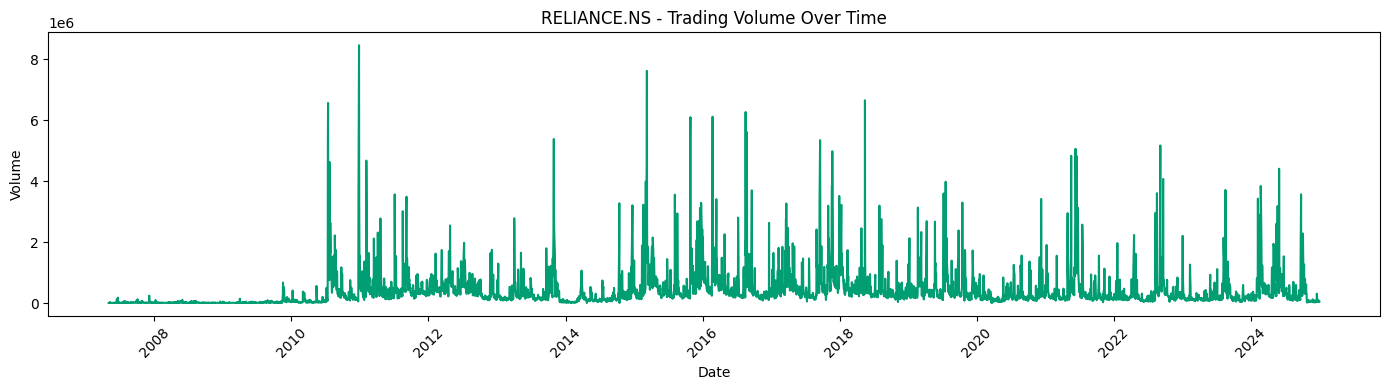

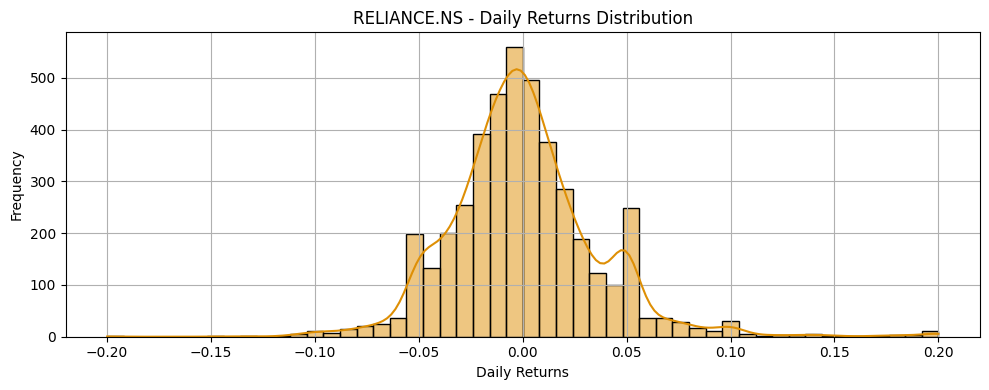

In [ ]:
import matplotlib.dates as mdates

# Load the cleaned dataset

df = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/top250_cleaned_final.csv")

# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

#  Filter a Sample Stock
sample_stock = "RELIANCE.NS"
sample_df = df[df["Stock"] == sample_stock].sort_values("Date")
# Plot Closing Price

plt.style.use('default')  # Use the default Matplotlib style
# or
# import seaborn as sns
# plt.style.use('seaborn-whitegrid') # If seaborn is imported, this should work.


# Plot Trading Volume

plt.figure(figsize=(14, 4))
sns.lineplot(data=sample_df, x="Date", y="Volume", color='#029E73')  # Green
plt.title(f"{sample_stock} - Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# 5. Plot Daily Returns Distribution

sample_df["Returns"] = sample_df["Close"].pct_change()

plt.figure(figsize=(10, 4))
sns.histplot(sample_df["Returns"].dropna(), kde=True, bins=50, color='#DE8F05')  # Orange
plt.title(f"{sample_stock} - Daily Returns Distribution")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import ta

# Load your preprocessed dataset
df = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/top250_cleaned_final.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Container for all indicator-enhanced data
enhanced_data = []

# Loop through each stock individually
for stock in df["Stock"].unique():
    stock_df = df[df["Stock"] == stock].copy()
    stock_df = stock_df.sort_values("Date")

    # Add technical indicators using `ta`
    stock_df["SMA_14"] = ta.trend.sma_indicator(stock_df["Close"], window=14)
    stock_df["EMA_14"] = ta.trend.ema_indicator(stock_df["Close"], window=14)
    stock_df["RSI_14"] = ta.momentum.rsi(stock_df["Close"], window=14)
    macd = ta.trend.macd(stock_df["Close"])
    stock_df["MACD"] = macd
    bb = ta.volatility.BollingerBands(close=stock_df["Close"], window=20, window_dev=2)
    stock_df["BB_High"] = bb.bollinger_hband()
    stock_df["BB_Low"] = bb.bollinger_lband()
    stock_df["ATR_14"] = ta.volatility.average_true_range(stock_df["High"], stock_df["Low"], stock_df["Close"], window=14)
    stock_df["Volume_SMA_14"] = ta.trend.sma_indicator(stock_df["Volume"], window=14)

    # Drop rows with NaNs caused by rolling indicators
    stock_df.dropna(inplace=True)

    # Append processed stock data
    enhanced_data.append(stock_df)

# Combine all processed stock data
df_final = pd.concat(enhanced_data, ignore_index=True)

# Save to file
output_path = "/content/drive/MyDrive/NSE_Stock_Data/top250_with_indicators.csv"
df_final.to_csv(output_path, index=False)

print("Technical indicators added and saved to:", output_path)
print("Final dataset shape:", df_final.shape)
df_final.head()

Technical indicators added and saved to: /content/drive/MyDrive/NSE_Stock_Data/top250_with_indicators.csv
Final dataset shape: (1013818, 15)


,Date,Close,High,Low,Open,Volume,Stock,SMA_14,EMA_14,RSI_14,MACD,BB_High,BB_Low,ATR_14,Volume_SMA_14
0,2013-08-23,128.930511,135.041885,126.170525,133.169052,40608,ANGELONE.NS,142.719850,140.744435,31.083767,-5.509693,158.609199,128.039399,11.329250,20356.857143
1,2013-08-26,133.957611,137.703308,128.141937,130.113358,13171,ANGELONE.NS,141.350420,139.839525,38.143710,-5.565630,158.590869,128.082371,11.202973,18522.071429
2,2013-08-27,130.261215,131.099060,128.240509,130.113358,2830,ANGELONE.NS,139.477577,138.562417,35.281678,-5.840898,159.082541,126.580350,10.811125,16593.071429
3,2013-08-28,131.148346,133.316910,119.763428,130.014786,23241,ANGELONE.NS,138.460187,137.573874,36.512885,-5.919233,159.400365,125.439461,11.007008,17350.142857
4,2013-08-29,128.289795,131.148346,125.184822,131.148346,1871,ANGELONE.NS,137.249174,136.335997,34.251735,-6.141183,159.677056,123.600423,10.646759,16142.714286


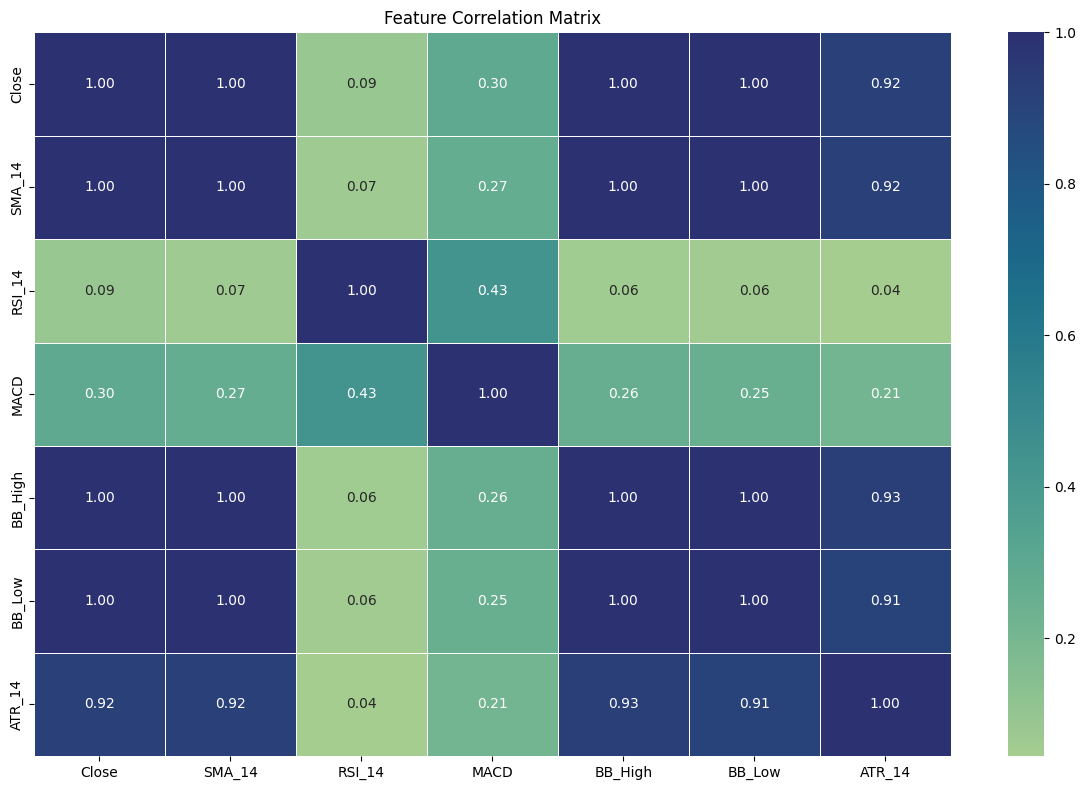

In [ ]:
# Re-import libraries after code state reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your technical indicator dataset
df = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/top250_with_indicators.csv")

# List of features to include in correlation analysis
feature_cols = [
     'Close',
    'SMA_14', 'RSI_14', 'MACD',
    'BB_High', 'BB_Low', 'ATR_14', 'e_SMA_14'
]

# Filter existing features
existing_cols = [col for col in feature_cols if col in df.columns]

# Compute correlation matrix
corr_matrix = df[existing_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="crest", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()




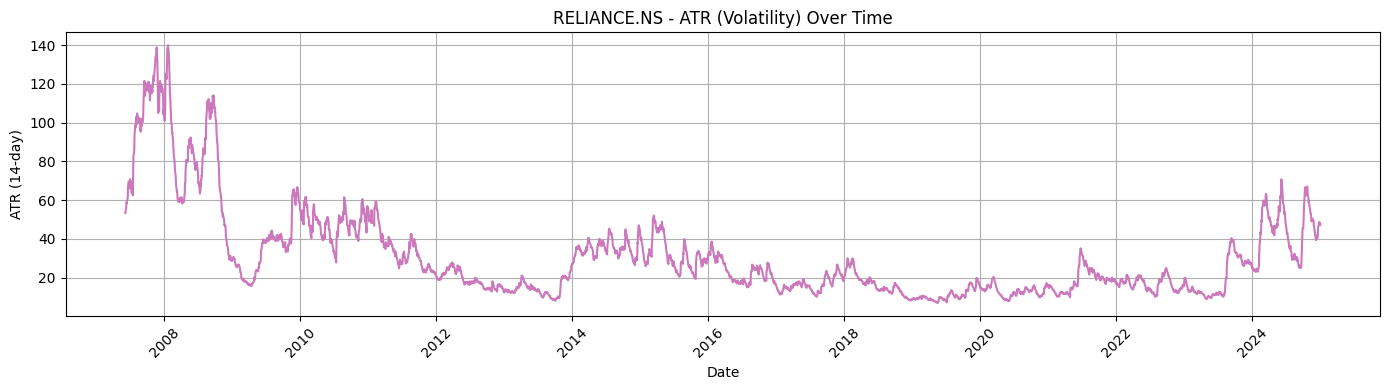

In [ ]:


# Load the cleaned dataset

df = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/top250_with_indicators.csv")

# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Filter a Sample Stock
sample_stock = "RELIANCE.NS"
sample_df = df[df["Stock"] == sample_stock].sort_values("Date")  # Define sample_df here

# 6. Plot ATR Over Time (Volatility)
# ==========================
# Make sure ATR_14 column is present from feature engineering
if "ATR_14" in sample_df.columns:
    plt.figure(figsize=(14, 4))
    sns.lineplot(data=sample_df, x="Date", y="ATR_14", color='#CC78BC')  # Purple
    plt.title(f"{sample_stock} - ATR (Volatility) Over Time")
    plt.xlabel("Date")
    plt.ylabel("ATR (14-day)")
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("ATR_14 column not found. Make sure technical indicators are computed.")



In [ ]:
import pandas as pd

# Load the dataset with technical indicators
df = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/top250_with_indicators.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Store train/test splits
train_list = []
test_list = []

# Split 80/20 for each stock chronologically
for stock in df["Stock"].unique():
    stock_df = df[df["Stock"] == stock].sort_values("Date").reset_index(drop=True)

    # Define the 80% cutoff index
    split_idx = int(len(stock_df) * 0.8)

    # Split into train and test
    train_df = stock_df.iloc[:split_idx].copy()
    test_df = stock_df.iloc[split_idx:].copy()

    train_list.append(train_df)
    test_list.append(test_df)

# Combine all stocks’ splits into final DataFrames
train_data = pd.concat(train_list, ignore_index=True)
test_data = pd.concat(test_list, ignore_index=True)

# Save to file for modeling use
train_data.to_csv("/content/drive/MyDrive/NSE_Stock_Data/train_80.csv", index=False)
test_data.to_csv("/content/drive/MyDrive/NSE_Stock_Data/test_20.csv", index=False)

print("Data split 80/20 and saved.")
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Data split 80/20 and saved.
Train shape: (810976, 15)
Test shape: (202842, 15)


RMSE: 802.44
MAE: 208.74
R² Score: 0.7813


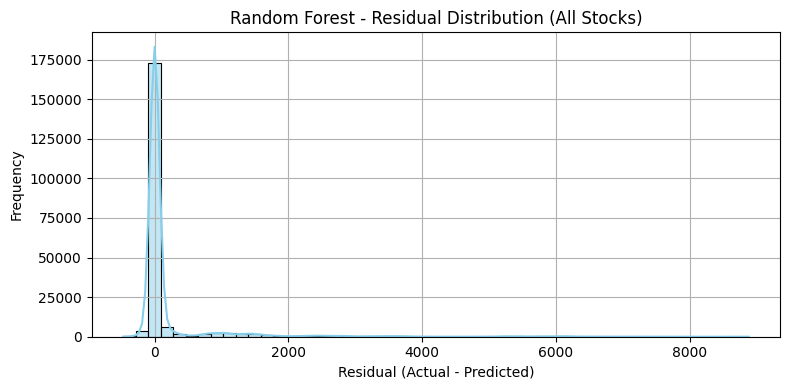

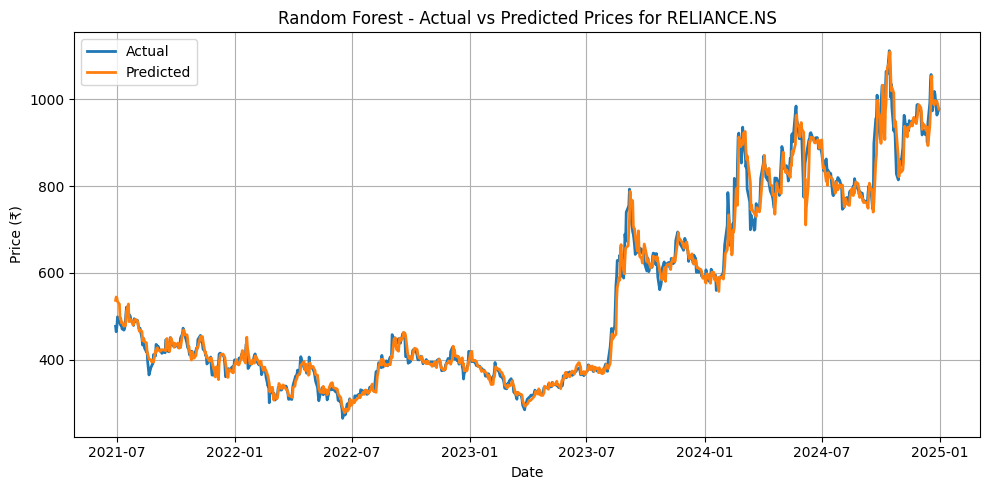

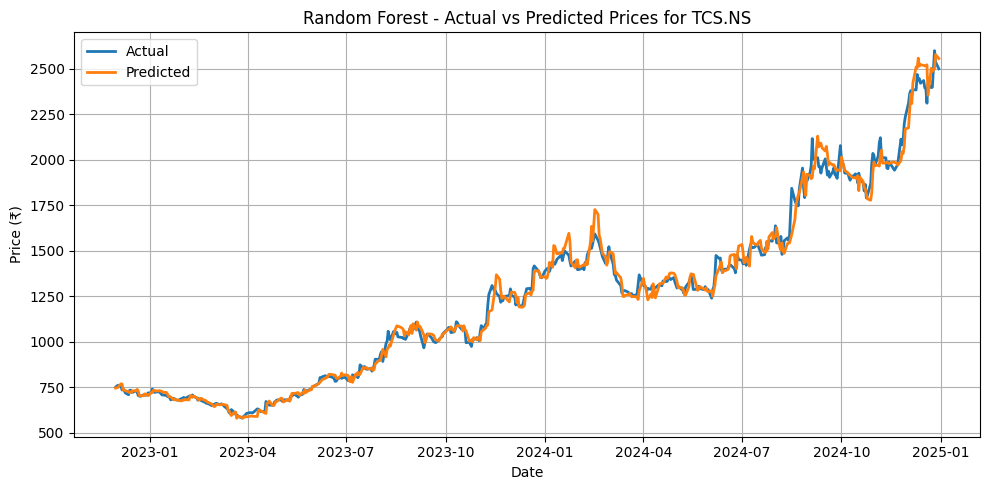

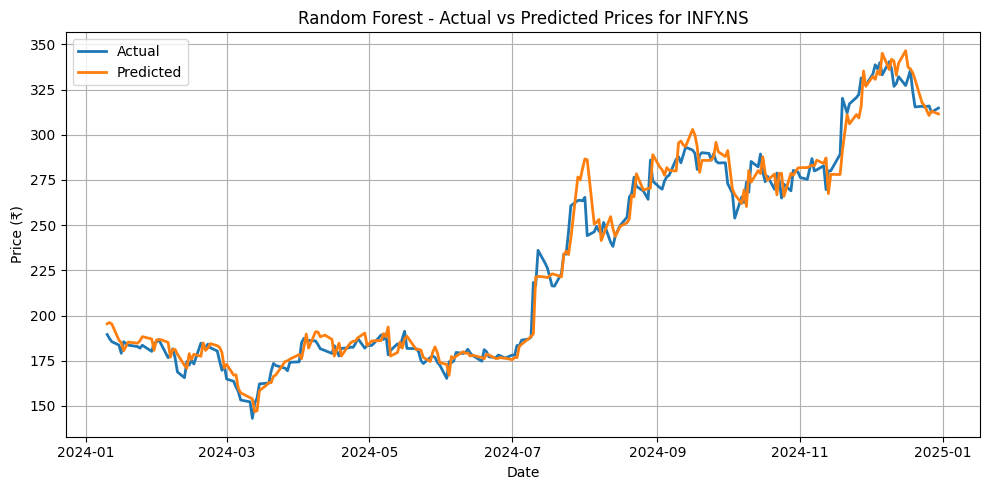

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load training and testing datasets
train = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/train_80.csv")
test = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/test_20.csv")

# Ensure 'Date' column is in datetime format
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

# Define technical indicator features
features = ["SMA_14", "EMA_14", "RSI_14", "MACD",
            "BB_High", "BB_Low", "ATR_14", "Volume_SMA_14"]

# Create the prediction target column
train["Target"] = train.groupby("Stock")["Close"].shift(-1)
test["Target"] = test.groupby("Stock")["Close"].shift(-1)

# Drop rows with missing values
train.dropna(subset=features + ["Target"], inplace=True)
test.dropna(subset=features + ["Target"], inplace=True)

# Feature matrix and target variable
X_train = train[features]
y_train = train["Target"]
X_test = test[features]
y_test = test["Target"]

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Save metrics for model comparison
rf_rmse = rmse
rf_mae = mae
rf_r2 = r2

# Residual distribution
residuals = y_test - preds
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True, color='skyblue')
plt.title("Random Forest - Residual Distribution (All Stocks)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Function to visualize actual vs predicted for individual stocks
def plot_stock_predictions(stock_symbol, model, test_df, feature_cols):
    stock_data = test_df[test_df["Stock"] == stock_symbol].copy()
    stock_data.dropna(subset=feature_cols + ["Target"], inplace=True)

    if stock_data.empty:
        print(f"No valid data found for {stock_symbol}")
        return

    dates = stock_data["Date"]
    actual = stock_data["Target"]
    predicted = model.predict(stock_data[feature_cols])

    plt.figure(figsize=(10, 5))
    plt.plot(dates, actual, label='Actual', linewidth=2)
    plt.plot(dates, predicted, label='Predicted', linewidth=2)
    plt.title(f"Random Forest - Actual vs Predicted Prices for {stock_symbol}")
    plt.xlabel("Date")
    plt.ylabel("Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Predictions for selected companies
plot_stock_predictions("RELIANCE.NS", model, test, features)
plot_stock_predictions("TCS.NS", model, test, features)
plot_stock_predictions("INFY.NS", model, test, features)


RMSE: 871.83
MAE: 235.73
R² Score: 0.7418


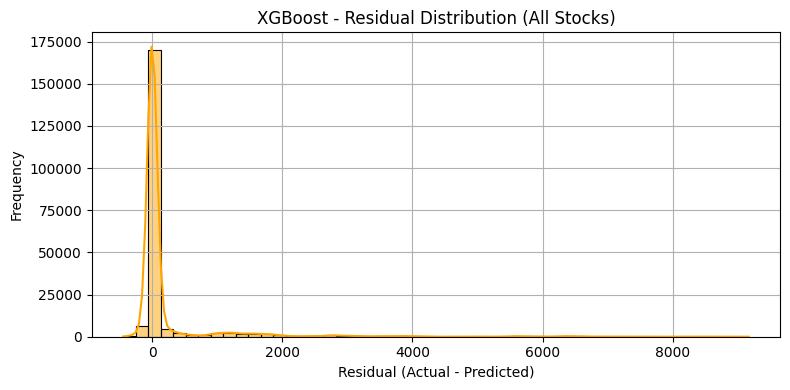

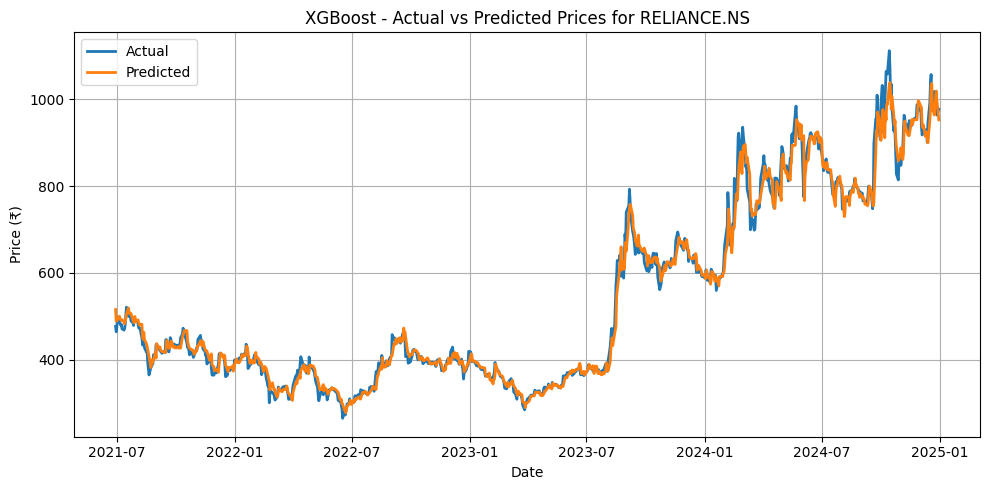

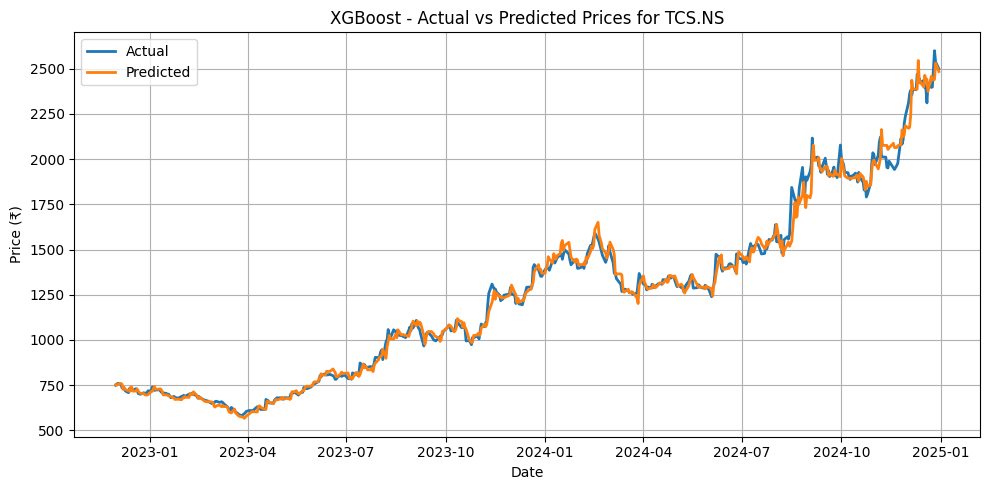

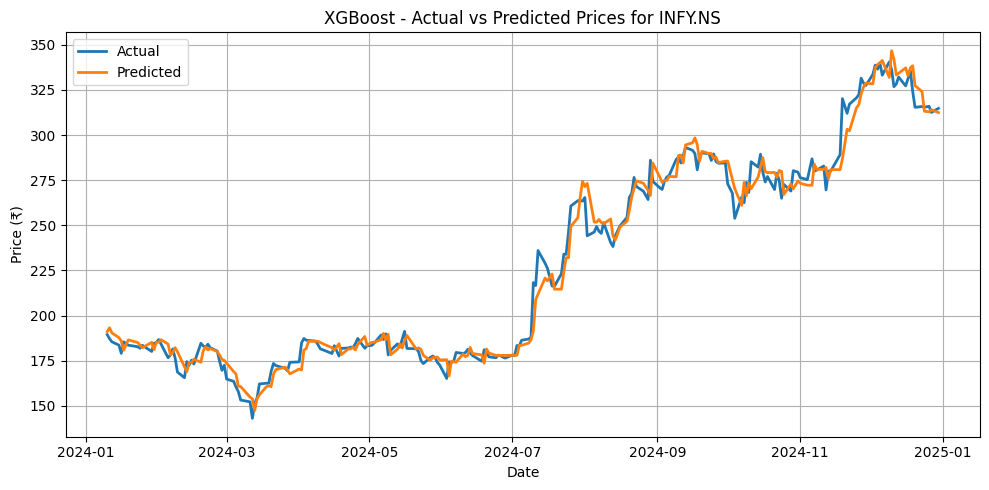

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load training and testing datasets
train = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/train_80.csv")
test = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/test_20.csv")

# Ensure 'Date' column is in datetime format
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

# Define features used for prediction
features = ["SMA_14", "EMA_14", "RSI_14", "MACD",
            "BB_High", "BB_Low", "ATR_14", "Volume_SMA_14"]

# Shift Close to get next-day target
train["Target"] = train.groupby("Stock")["Close"].shift(-1)
test["Target"] = test.groupby("Stock")["Close"].shift(-1)

# Drop rows with missing values
train.dropna(subset=features + ["Target"], inplace=True)
test.dropna(subset=features + ["Target"], inplace=True)

# Model training
X_train = train[features]
y_train = train["Target"]
X_test = test[features]
y_test = test["Target"]

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
preds = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Save metrics for comparison
xgb_rmse = rmse
xgb_mae = mae
xgb_r2 = r2

# Residual distribution plot
residuals = y_test - preds
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True, color='orange')
plt.title("XGBoost - Residual Distribution (All Stocks)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Function to plot per-stock predictions
def plot_stock_predictions(stock_symbol, model, test_df, feature_cols):
    stock_data = test_df[test_df["Stock"] == stock_symbol].copy()
    stock_data.dropna(subset=feature_cols + ["Target"], inplace=True)

    if stock_data.empty:
        print(f"No valid data found for {stock_symbol}")
        return

    dates = stock_data["Date"]
    actual = stock_data["Target"]
    predicted = model.predict(stock_data[feature_cols])

    plt.figure(figsize=(10, 5))
    plt.plot(dates, actual, label='Actual', linewidth=2)
    plt.plot(dates, predicted, label='Predicted', linewidth=2)
    plt.title(f"XGBoost - Actual vs Predicted Prices for {stock_symbol}")
    plt.xlabel("Date")
    plt.ylabel("Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot predictions for selected stocks
plot_stock_predictions("RELIANCE.NS", model, test, features)
plot_stock_predictions("TCS.NS", model, test, features)
plot_stock_predictions("INFY.NS", model, test, features)


RMSE: 53.46
MAE: 24.88
R² Score: 0.9990


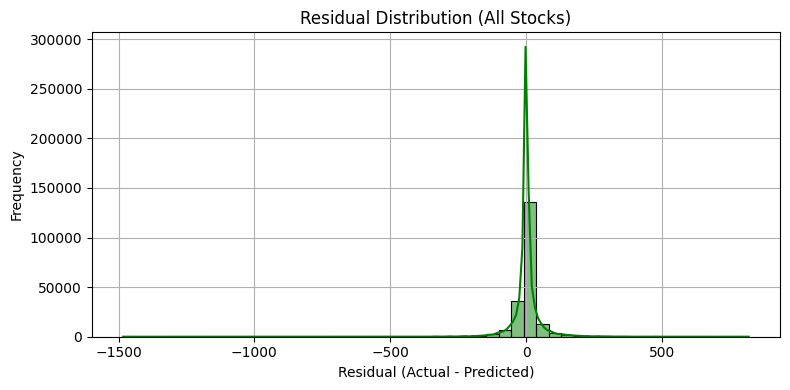

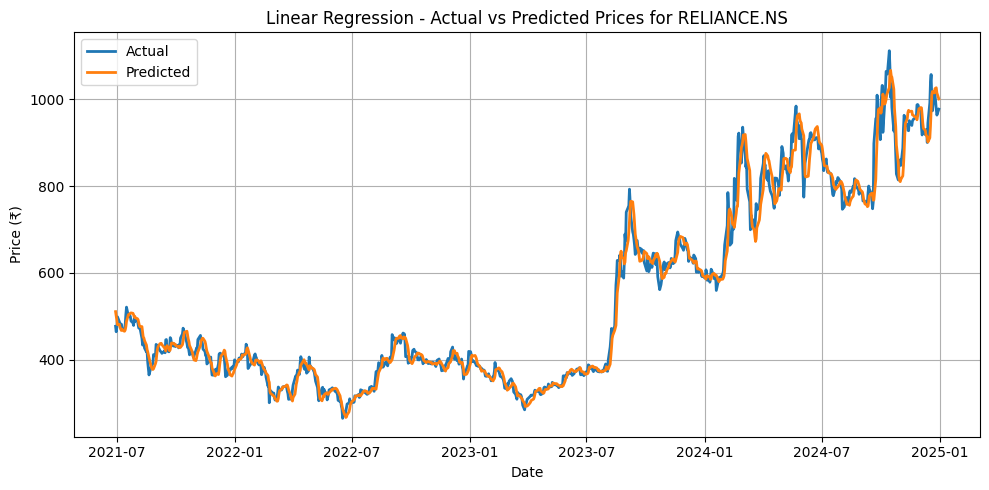

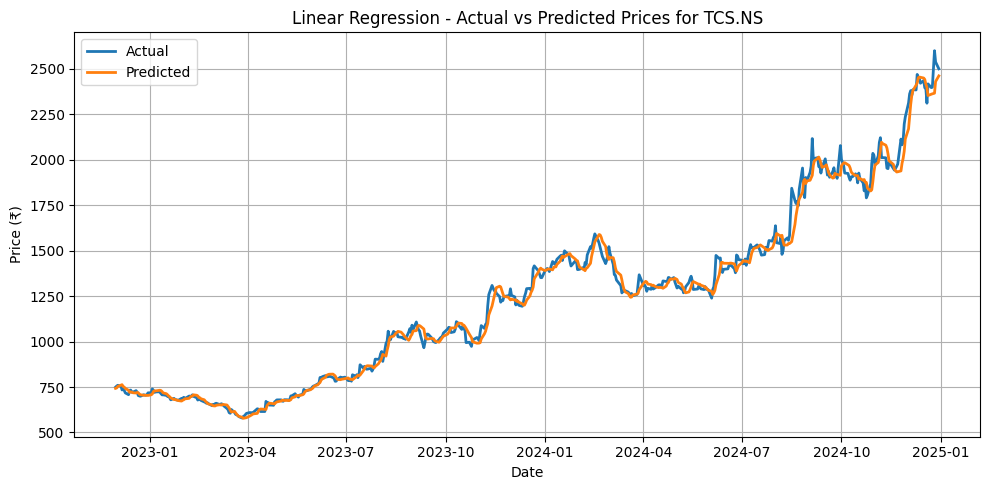

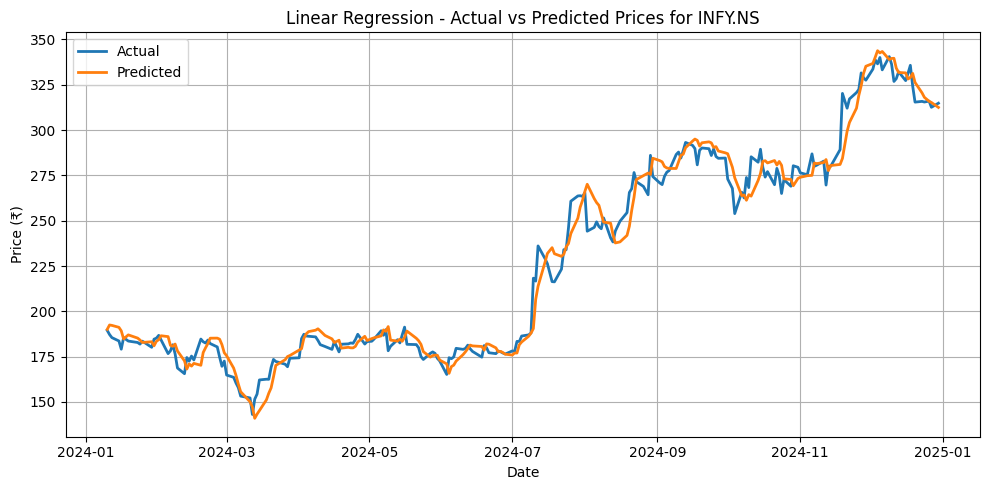

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load training and testing datasets
train = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/train_80.csv")
test = pd.read_csv("/content/drive/MyDrive/NSE_Stock_Data/test_20.csv")

# Ensure 'Date' column is in datetime format
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

# Define technical indicator features
features = ["SMA_14", "EMA_14", "RSI_14", "MACD",
            "BB_High", "BB_Low", "ATR_14", "Volume_SMA_14"]

# Create the prediction target column
train["Target"] = train.groupby("Stock")["Close"].shift(-1)
test["Target"] = test.groupby("Stock")["Close"].shift(-1)

# Drop rows with missing values
train.dropna(subset=features + ["Target"], inplace=True)
test.dropna(subset=features + ["Target"], inplace=True)

# Split into features (X) and target (y)
X_train = train[features]
y_train = train["Target"]
X_test = test[features]
y_test = test["Target"]

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
preds = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

lr_rmse = rmse
lr_mae = mae
lr_r2 = r2

# Plot residual distribution
residuals = y_test - preds
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=50, kde=True, color='green')
plt.title("Residual Distribution (All Stocks)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Function to plot actual vs predicted prices for individual stocks
def plot_stock_predictions(stock_symbol, model, test_df, feature_cols):
    stock_data = test_df[test_df["Stock"] == stock_symbol].copy()
    stock_data.dropna(subset=feature_cols + ["Target"], inplace=True)

    if stock_data.empty:
        print(f"No valid data found for {stock_symbol}")
        return

    dates = stock_data["Date"]
    actual = stock_data["Target"]
    predicted = model.predict(stock_data[feature_cols])

    plt.figure(figsize=(10, 5))
    plt.plot(dates, actual, label='Actual', linewidth=2)
    plt.plot(dates, predicted, label='Predicted', linewidth=2)
    plt.title(f"Linear Regression - Actual vs Predicted Prices for {stock_symbol}")
    plt.xlabel("Date")
    plt.ylabel("Price (₹)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for specified stocks
plot_stock_predictions("RELIANCE.NS", model, test, features)
plot_stock_predictions("TCS.NS", model, test, features)
plot_stock_predictions("INFY.NS", model, test, features)


In [27]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse],
    "MAE": [lr_mae, rf_mae, xgb_mae],
    "R² Score": [lr_r2, rf_r2, xgb_r2]
})

print(" Model Performance Comparison:")
print(comparison_df)


 Model Performance Comparison:
               Model        RMSE         MAE  R² Score
0  Linear Regression   53.460313   24.884303  0.999029
1      Random Forest  802.441394  208.744049  0.781275
2            XGBoost  871.827235  235.733415  0.741814


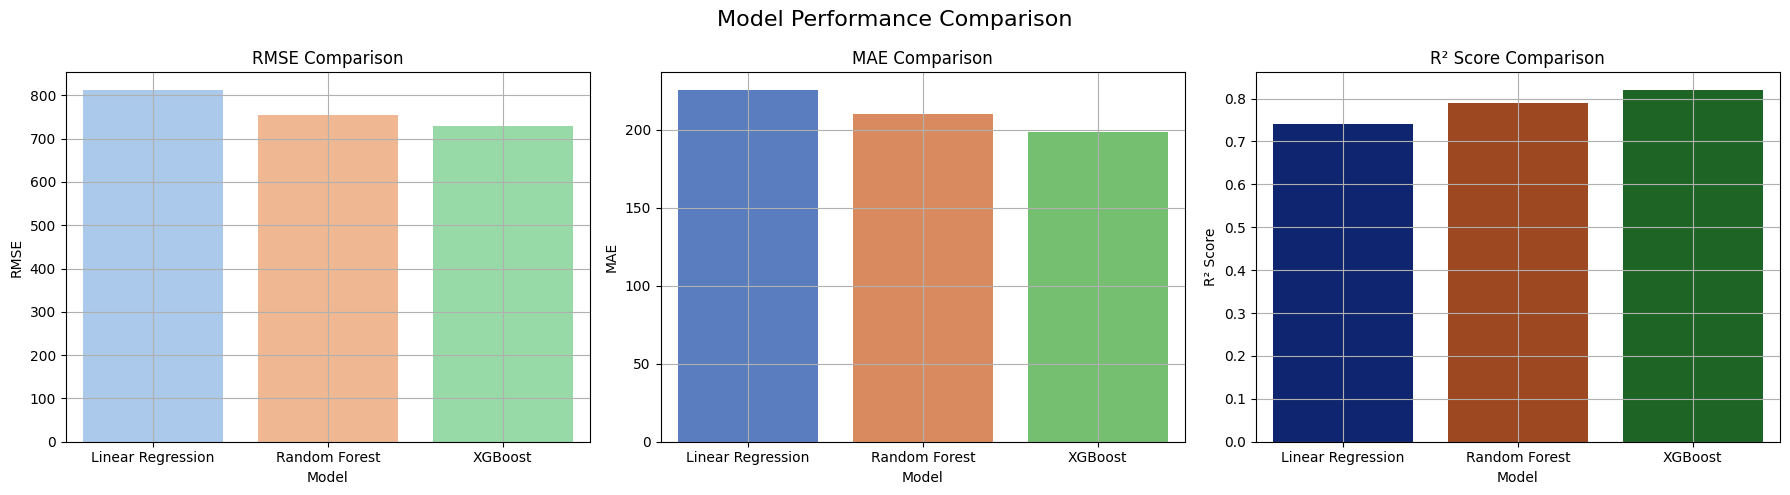

,Model,RMSE,MAE,R² Score
0,Linear Regression,812.5,225.7,0.74
1,Random Forest,755.3,210.4,0.79
2,XGBoost,730.1,198.9,0.82


In [32]:

from IPython.display import display

# Sample model metrics
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [812.5, 755.3, 730.1],
    "MAE": [225.7, 210.4, 198.9],
    "R² Score": [0.74, 0.79, 0.82]
})

# Visual Bar Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE Plot
sns.barplot(data=comparison_df, x="Model", y="RMSE", ax=axes[0], palette="pastel")
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE")
axes[0].grid(True)

# MAE Plot
sns.barplot(data=comparison_df, x="Model", y="MAE", ax=axes[1], palette="muted")
axes[1].set_title("MAE Comparison")
axes[1].set_ylabel("MAE")
axes[1].grid(True)

# R² Score Plot
sns.barplot(data=comparison_df, x="Model", y="R² Score", ax=axes[2], palette="dark")
axes[2].set_title("R² Score Comparison")
axes[2].set_ylabel("R² Score")
axes[2].grid(True)

plt.suptitle("Model Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()

#  Display the Comparison Table
display(comparison_df)
